<a href="https://colab.research.google.com/github/Aliksm-DataScientist/Customer_chrun_first_project/blob/Customer_Churn/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import tensorflow as tf

In [157]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
cnn = Sequential()

In [159]:
cnn.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())

In [160]:
cnn.add(Dense(1024, input_dim=3136, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(512,  activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(32, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(16, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(8, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(4, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))


In [161]:
from keras.optimizers import Adam
cnn.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

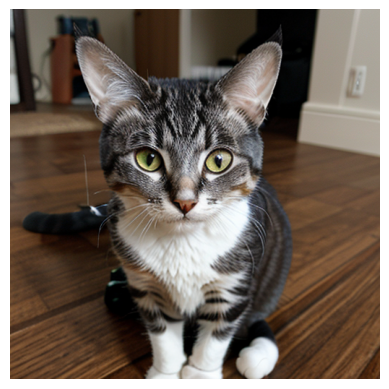

" img = load_img('/content/drive/MyDrive/animal/train_data/cat/00000-4122619873.png')  # this is a PIL image\nx = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)\nx = x.reshape((1,) + x.shape) "

In [162]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = mpimg.imread('/content/drive/MyDrive/animal/train_data/cat/00000-4122619873.png') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

''' img = load_img('/content/drive/MyDrive/animal/train_data/cat/00000-4122619873.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) '''

In [163]:
batch_size = 32
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/animal/train_data',  # this is the target directory
        target_size=(64, 64),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/animal/test_data',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 968 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [164]:
earlyStoping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [165]:
cnn.fit(train_generator,  steps_per_epoch=2000, epochs=500, validation_data=validation_generator, callbacks=[earlyStoping])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  31/2000 ━━━━━━━━━━━━━━━━━━━━ 34:03 1s/step - accuracy: 0.5291 - loss: 0.6912

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - accuracy: 0.5086 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/500
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.5041 - loss: 0.6953 - val_accuracy: 0.5357 - val_loss: 0.6918
Epoch 3/500
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.4868 - loss: 0.6985 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/500
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.4902 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 5/500
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.5030 - loss: 0.6979 - val_accuracy: 0.5000 - val_loss: 0.6939


In [167]:
validation_loss, validation_accuracy = cnn.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

print(f'Validation Accuracy: {validation_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - accuracy: 0.5357 - loss: 0.6918
Validation Accuracy: 0.5357


In [95]:
from keras.preprocessing.image import load_img
img = load_img(r'/content/drive/MyDrive/animal/train_data/cat/00000-4122619873.png', color_mode="rgb", target_size=(64,64), interpolation="nearest", keep_aspect_ratio=False)

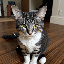

In [96]:
img

In [97]:
import numpy as np
img_array = img_to_array(img)
gfg = np.expand_dims(img_array, axis = 0)
gfg
p = cnn.predict(gfg)
p[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


0.49990466

In [168]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [170]:
model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/animal/train_data/dog/00502-3846168664.png'
img = load_img(img_path, target_size=(224, 224))
print(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

<PIL.Image.Image image mode=RGB size=224x224 at 0x7A1AAE69B1F0>
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [('n02088364', 'beagle', 0.42110163), ('n02108089', 'boxer', 0.112057395), ('n02089867', 'Walker_hound', 0.10342249)]
